In [1]:
!nvidia-smi

Mon Jan 13 04:45:17 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.8/906.8 kB 47.2 MB/s eta 0:00:00


In [3]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.5/112.6 GB disk)


In [4]:
from ultralytics import YOLO
from IPython.display import Image

In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="0BmZngidWizdFoCpKfQz")
project = rf.workspace("apollo-yvfzk").project("floorplan-segmentation-jqpcj")
version = project.version(1)
dataset = version.download("yolov11")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.4 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Floorplan-Segmentation-1 in yolov11:: 100%|██████████| 5900/5900 [00:01<00:00, 5037.23it/s]


In [6]:
dataset.location

'/content/Floorplan-Segmentation-1'

In [7]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=10 imgsz=1024

100% 5.35M/5.35M [00:00<00:00, 293MB/s]
Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/Floorplan-Segmentation-1/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=1024, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, sav

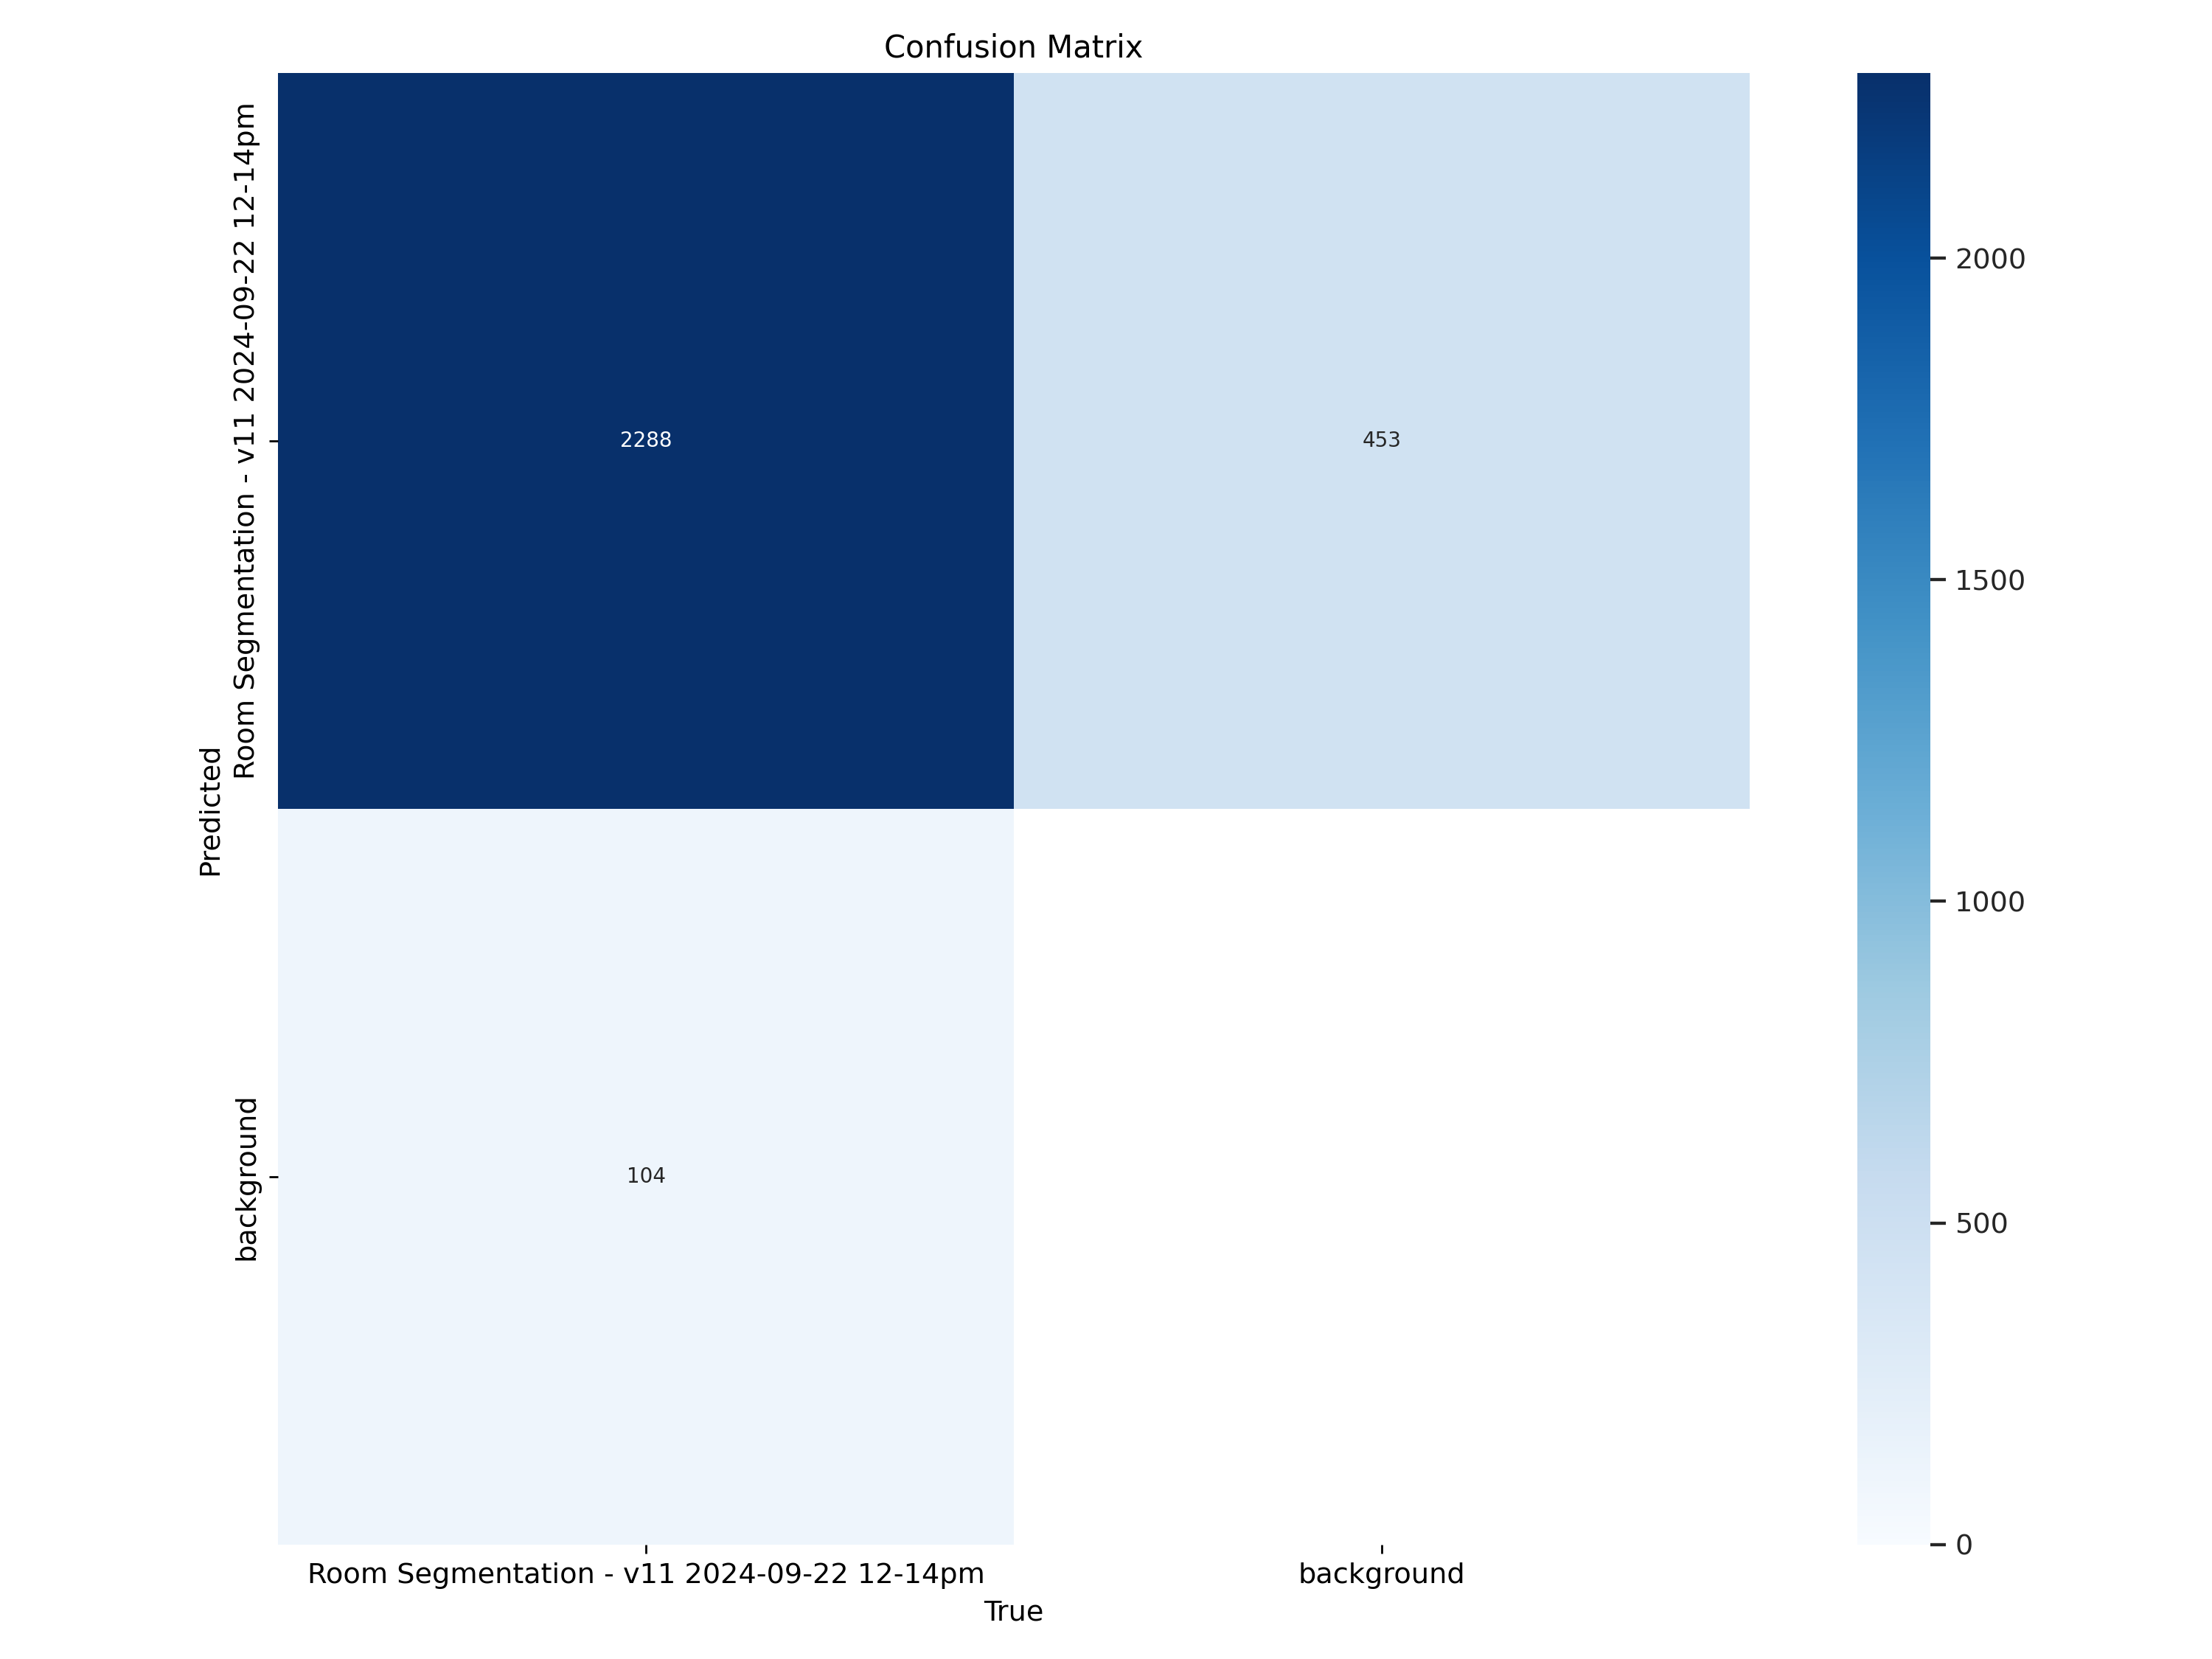

In [8]:
Image("/content/runs/detect/train/confusion_matrix.png", width=1200)

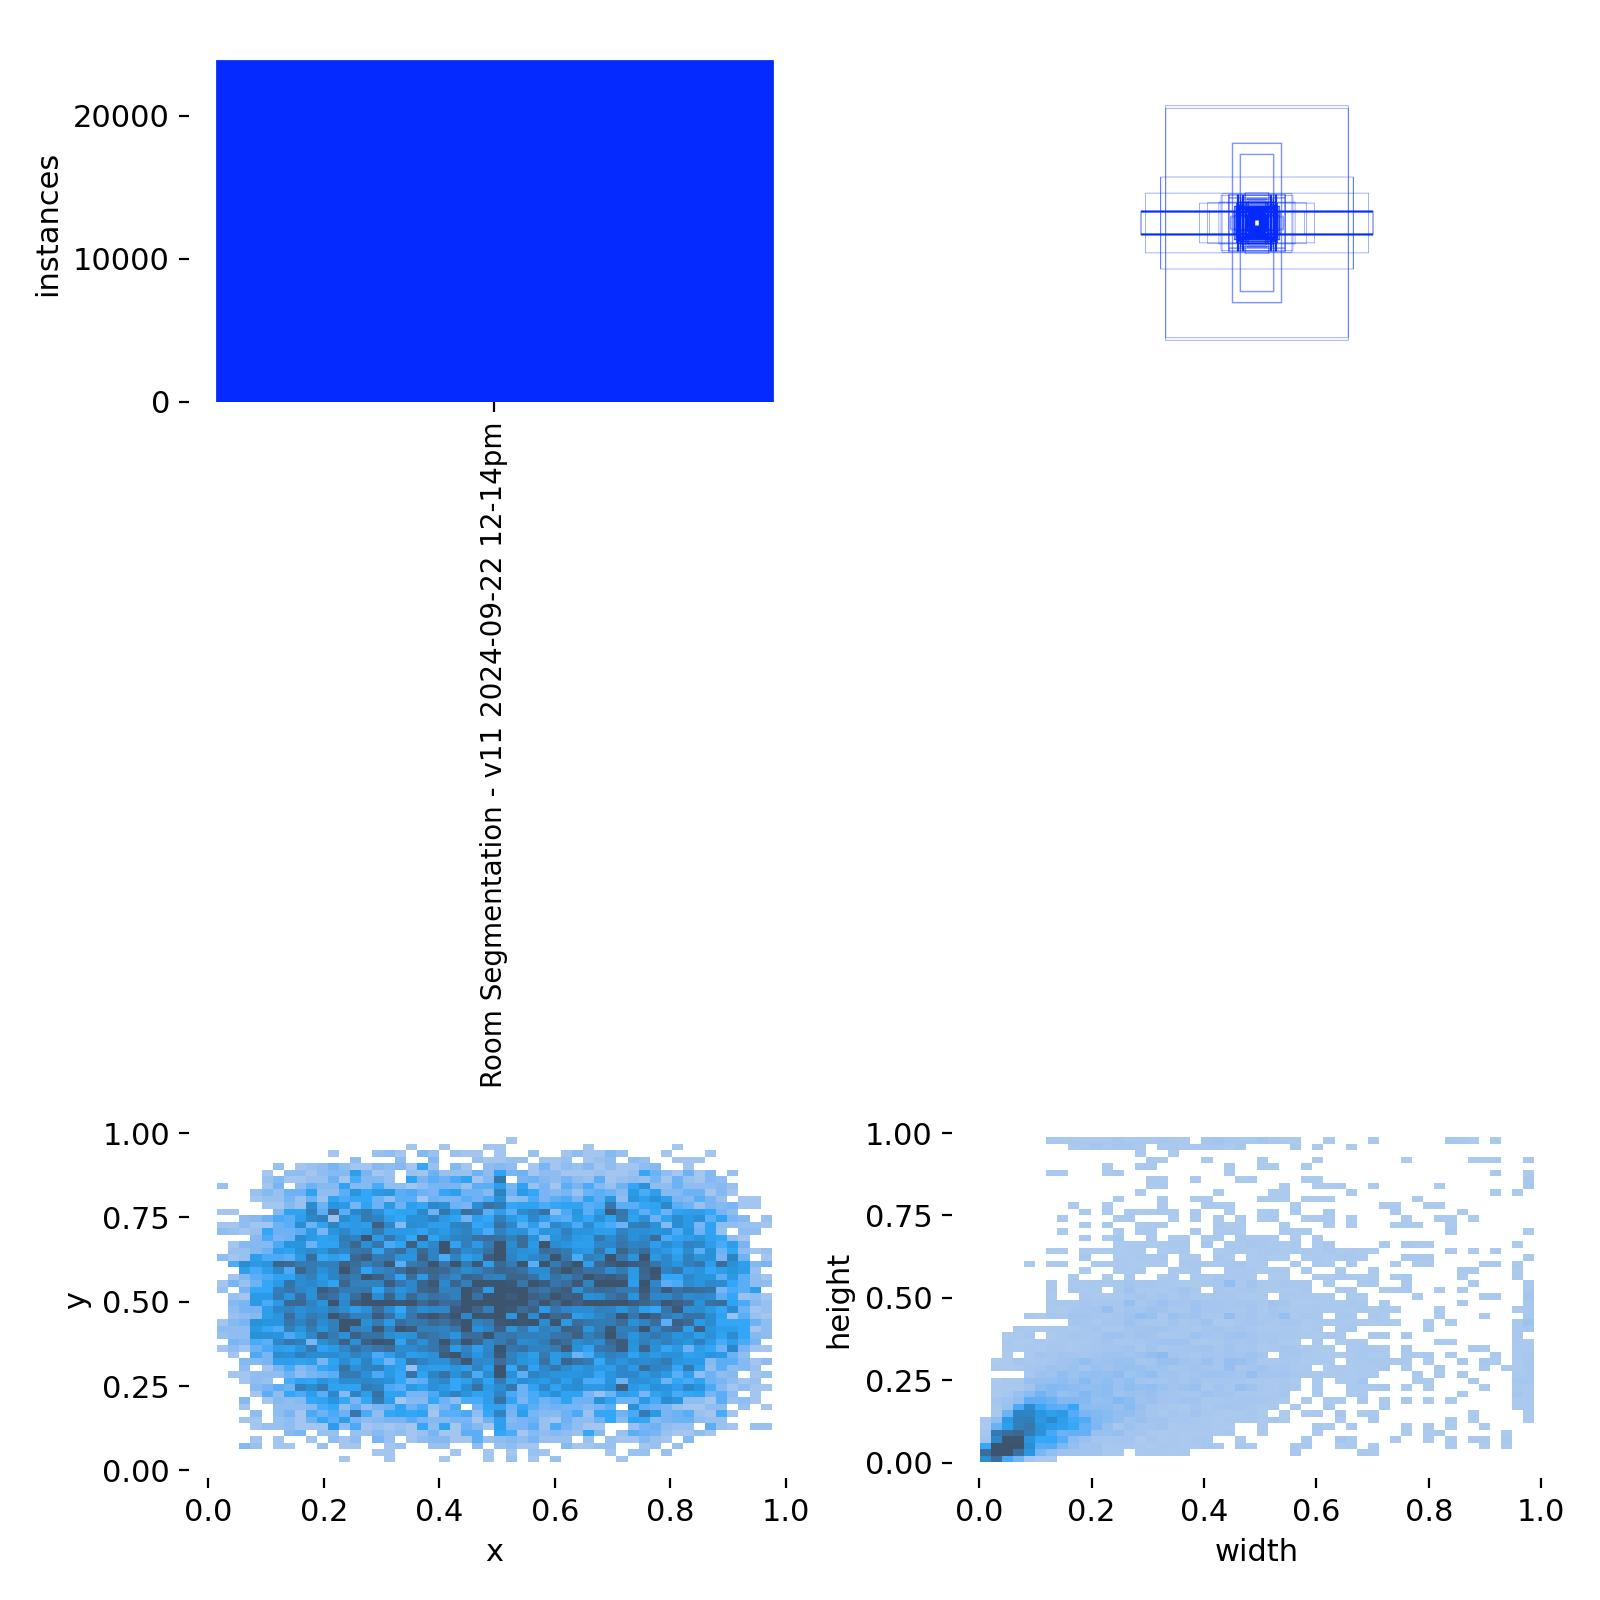

In [9]:
Image("/content/runs/detect/train/labels.jpg", width=600)

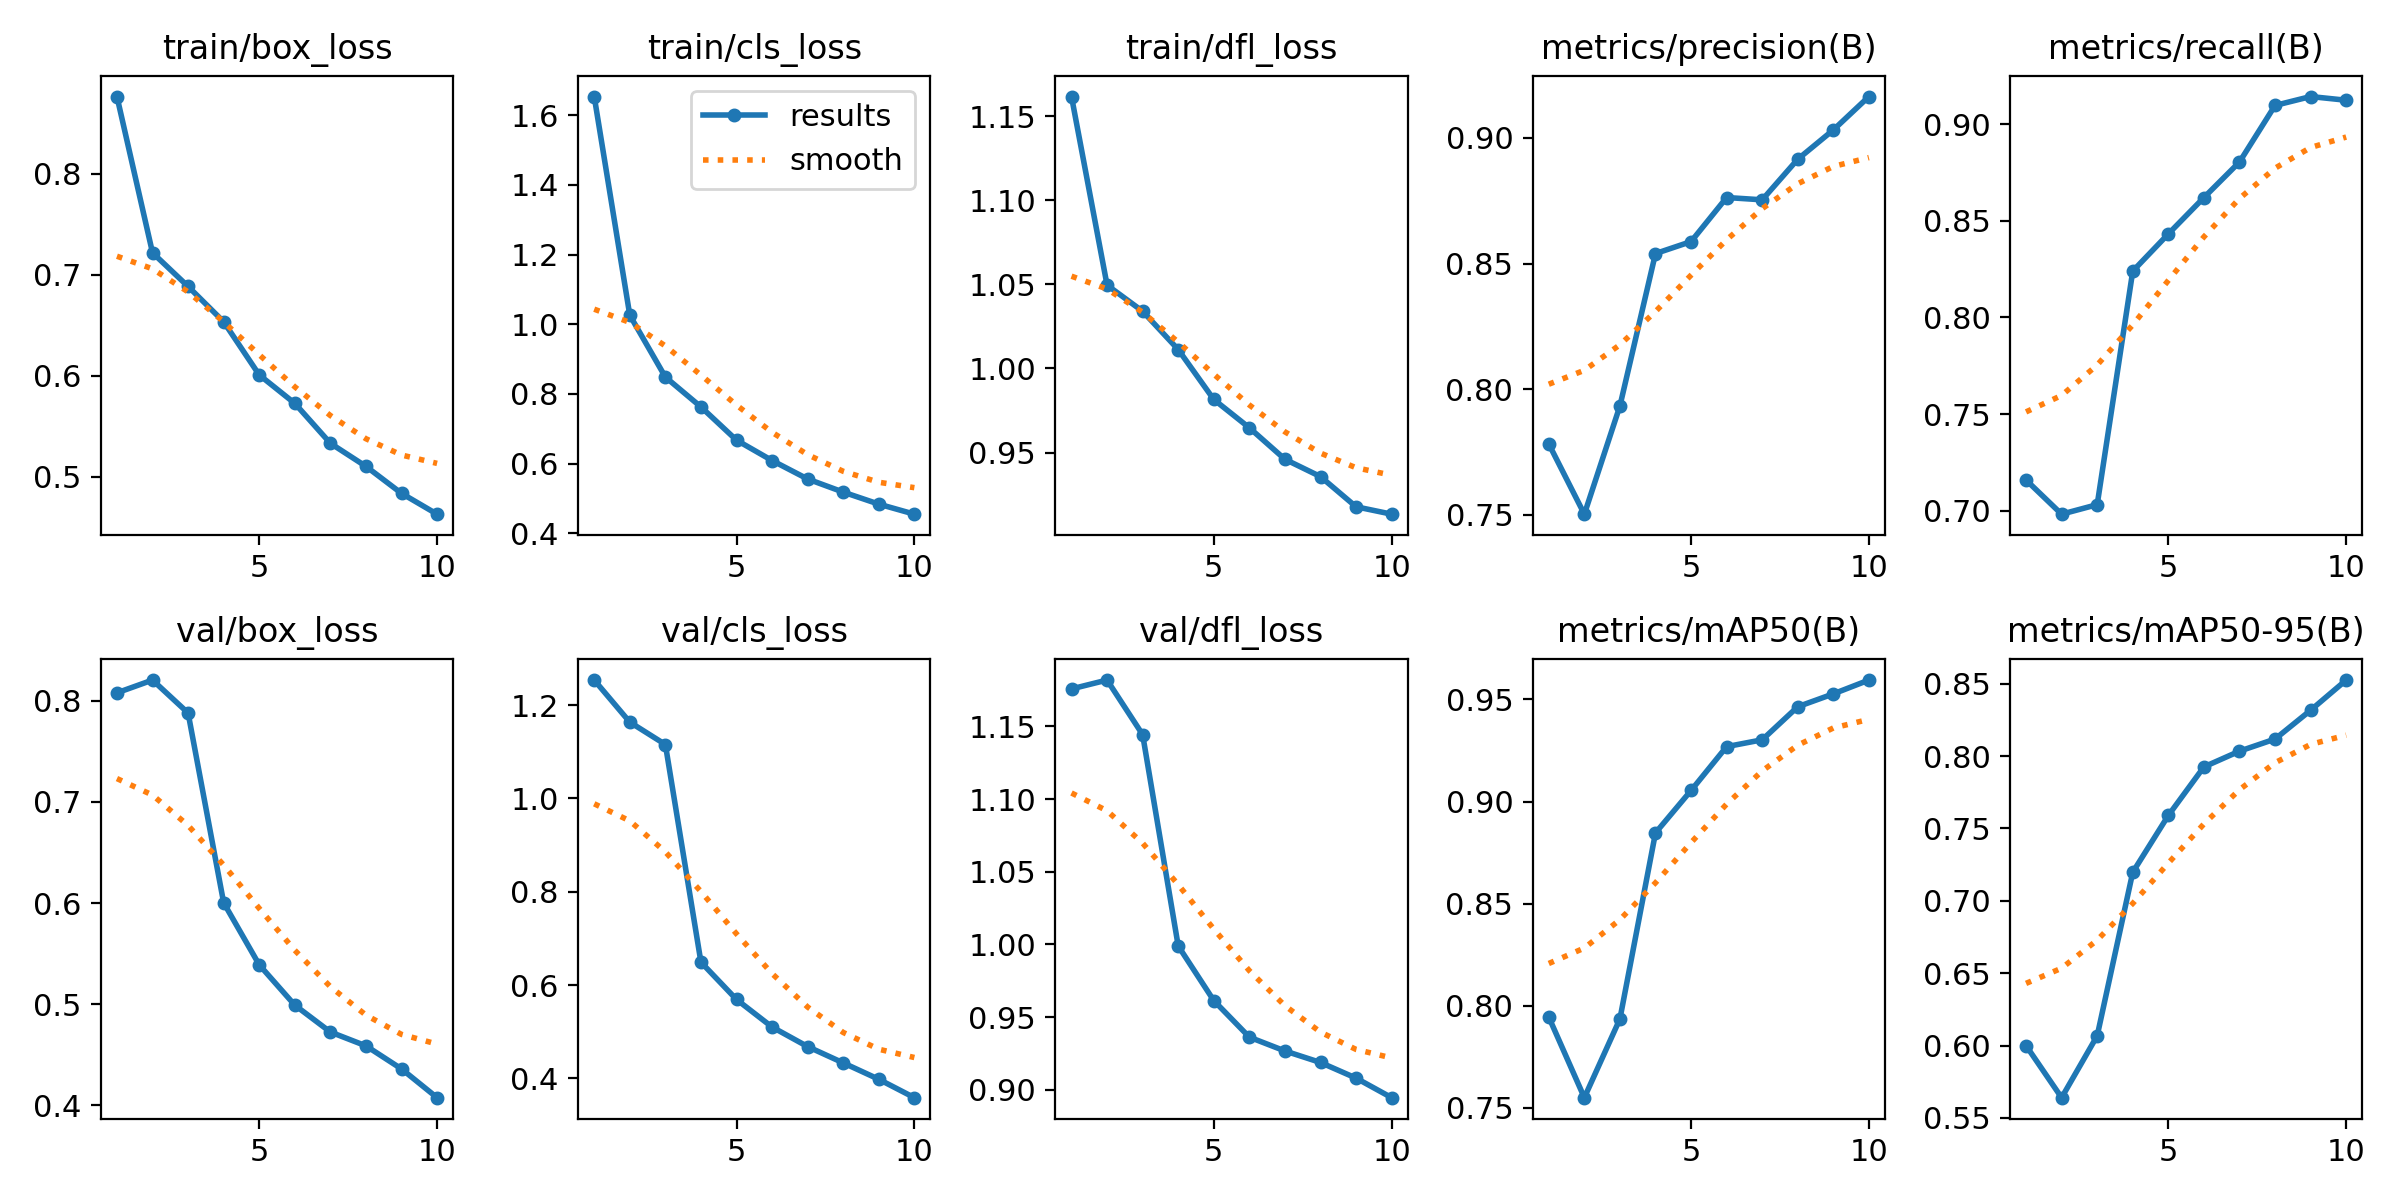

In [10]:
Image("/content/runs/detect/train/results.png", width=1200)

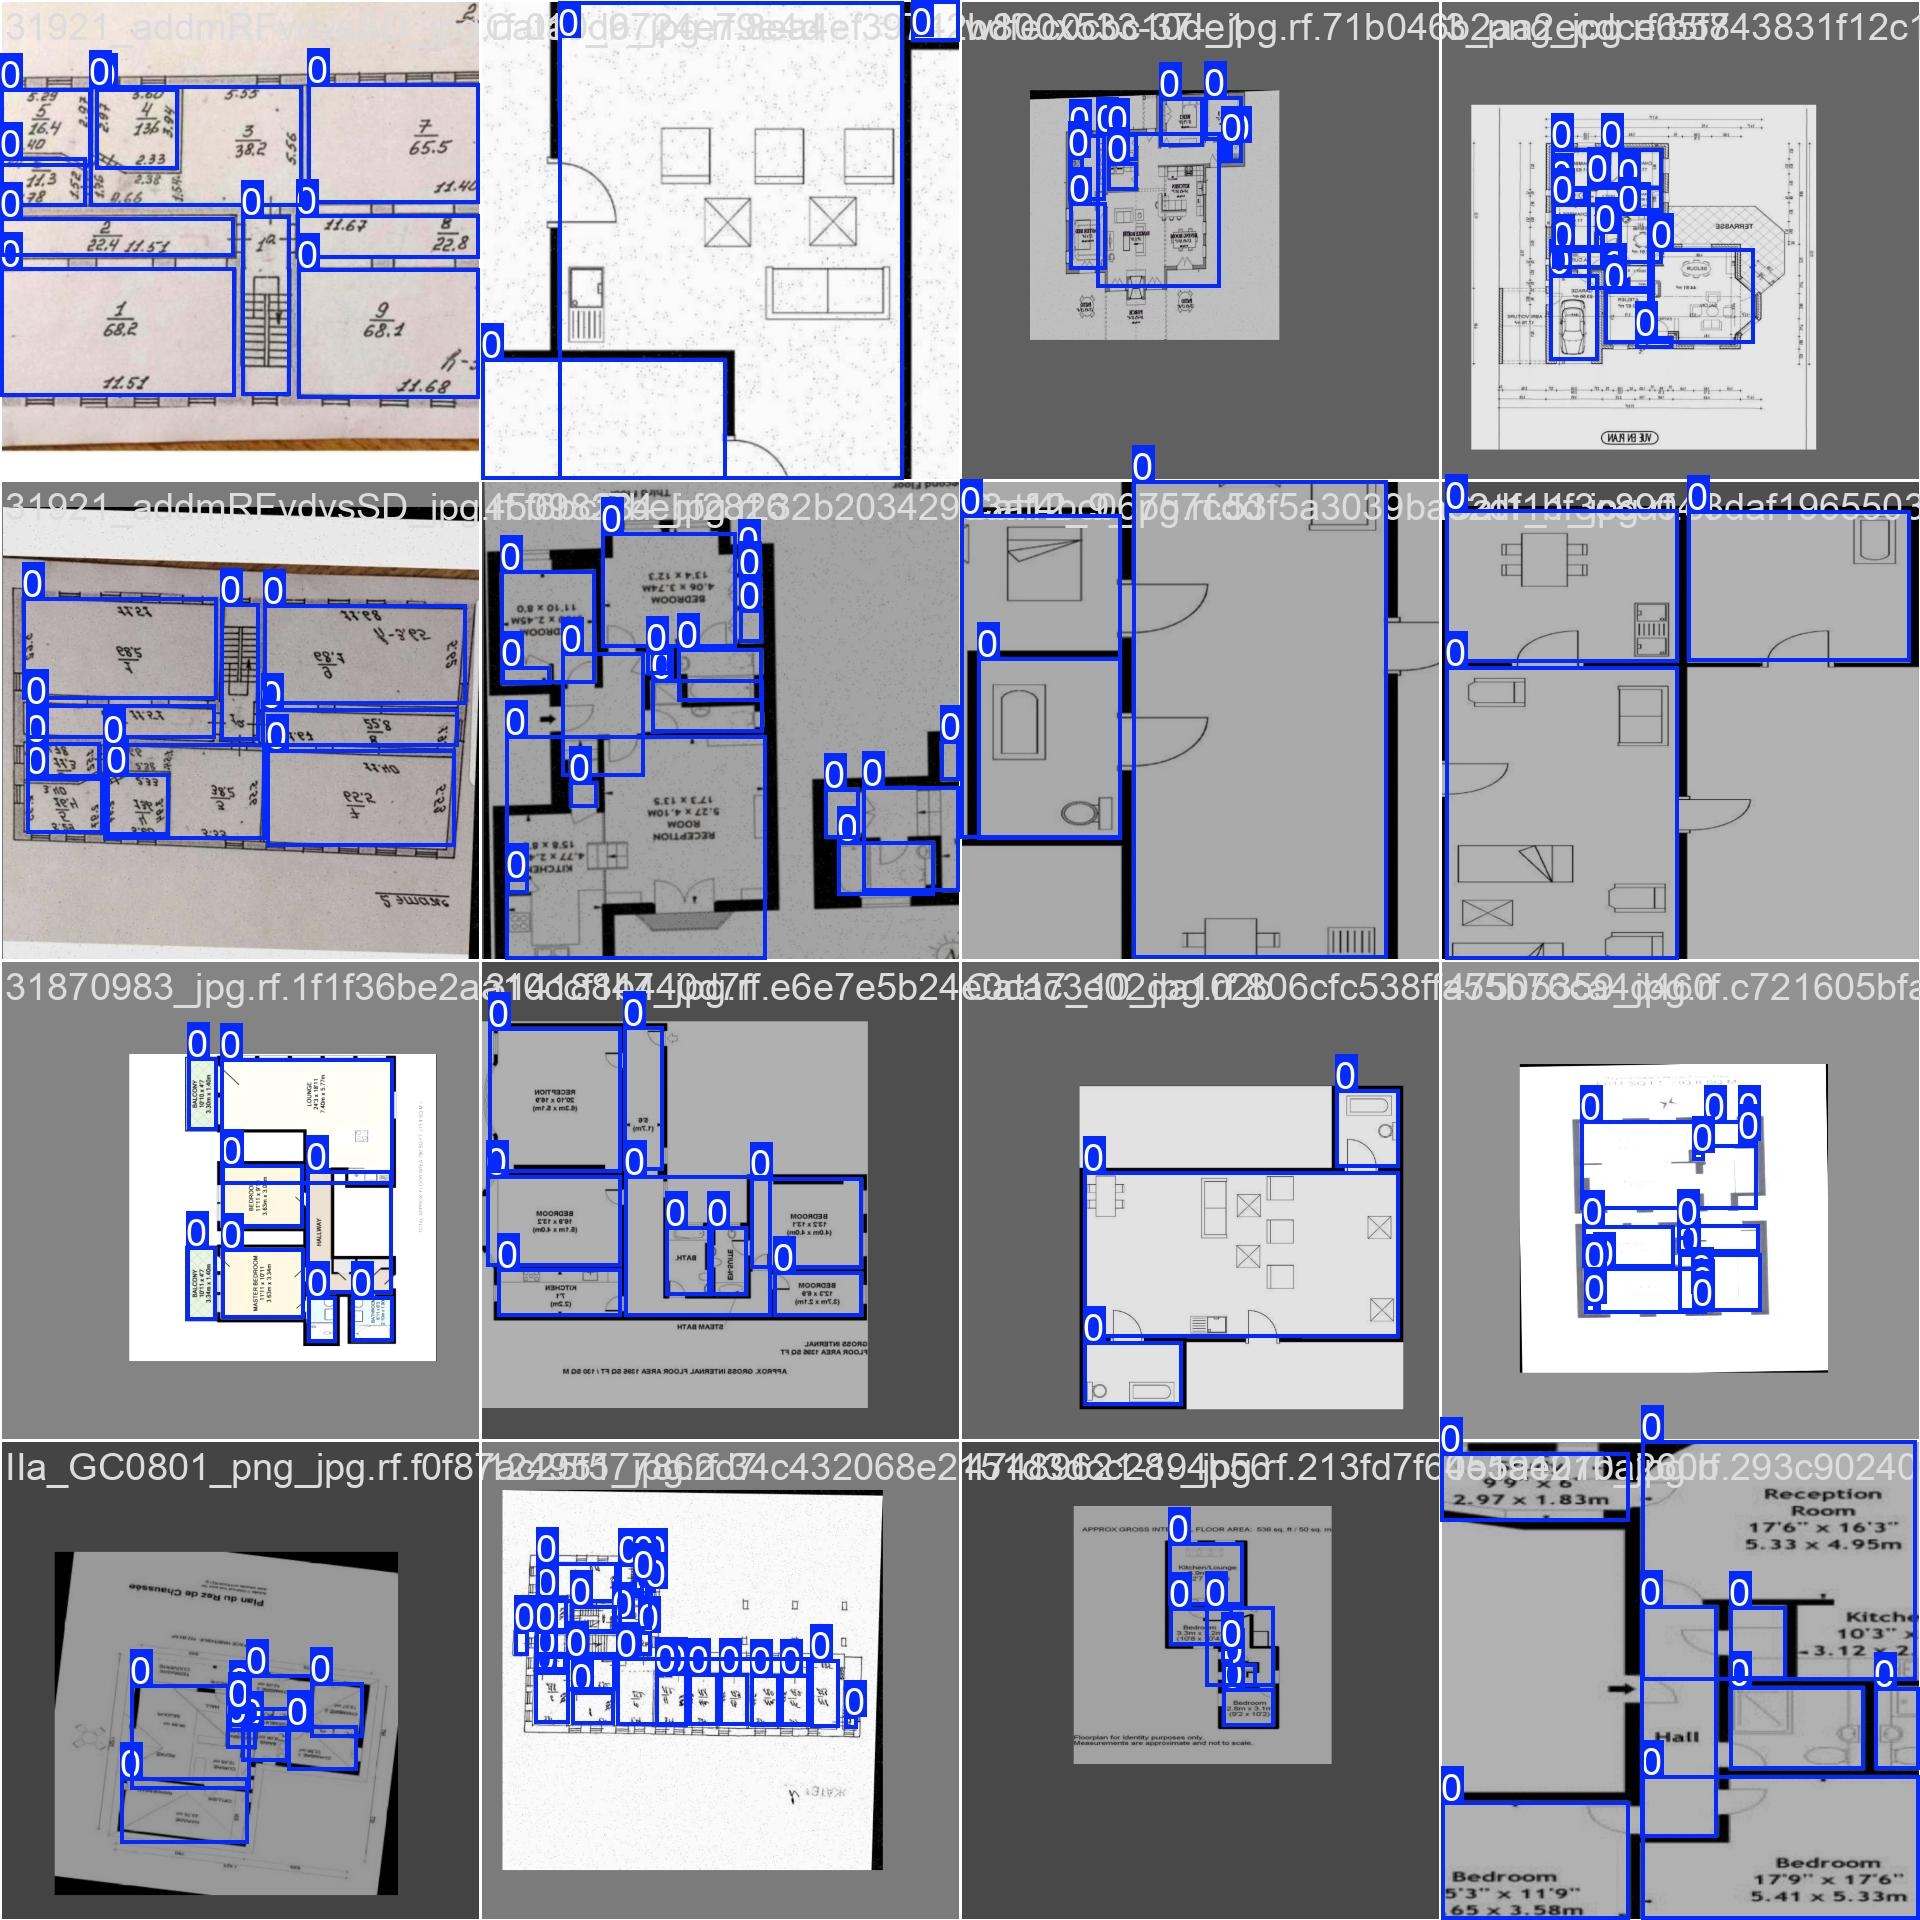

In [11]:
Image("/content/runs/detect/train/train_batch0.jpg", width=1200)

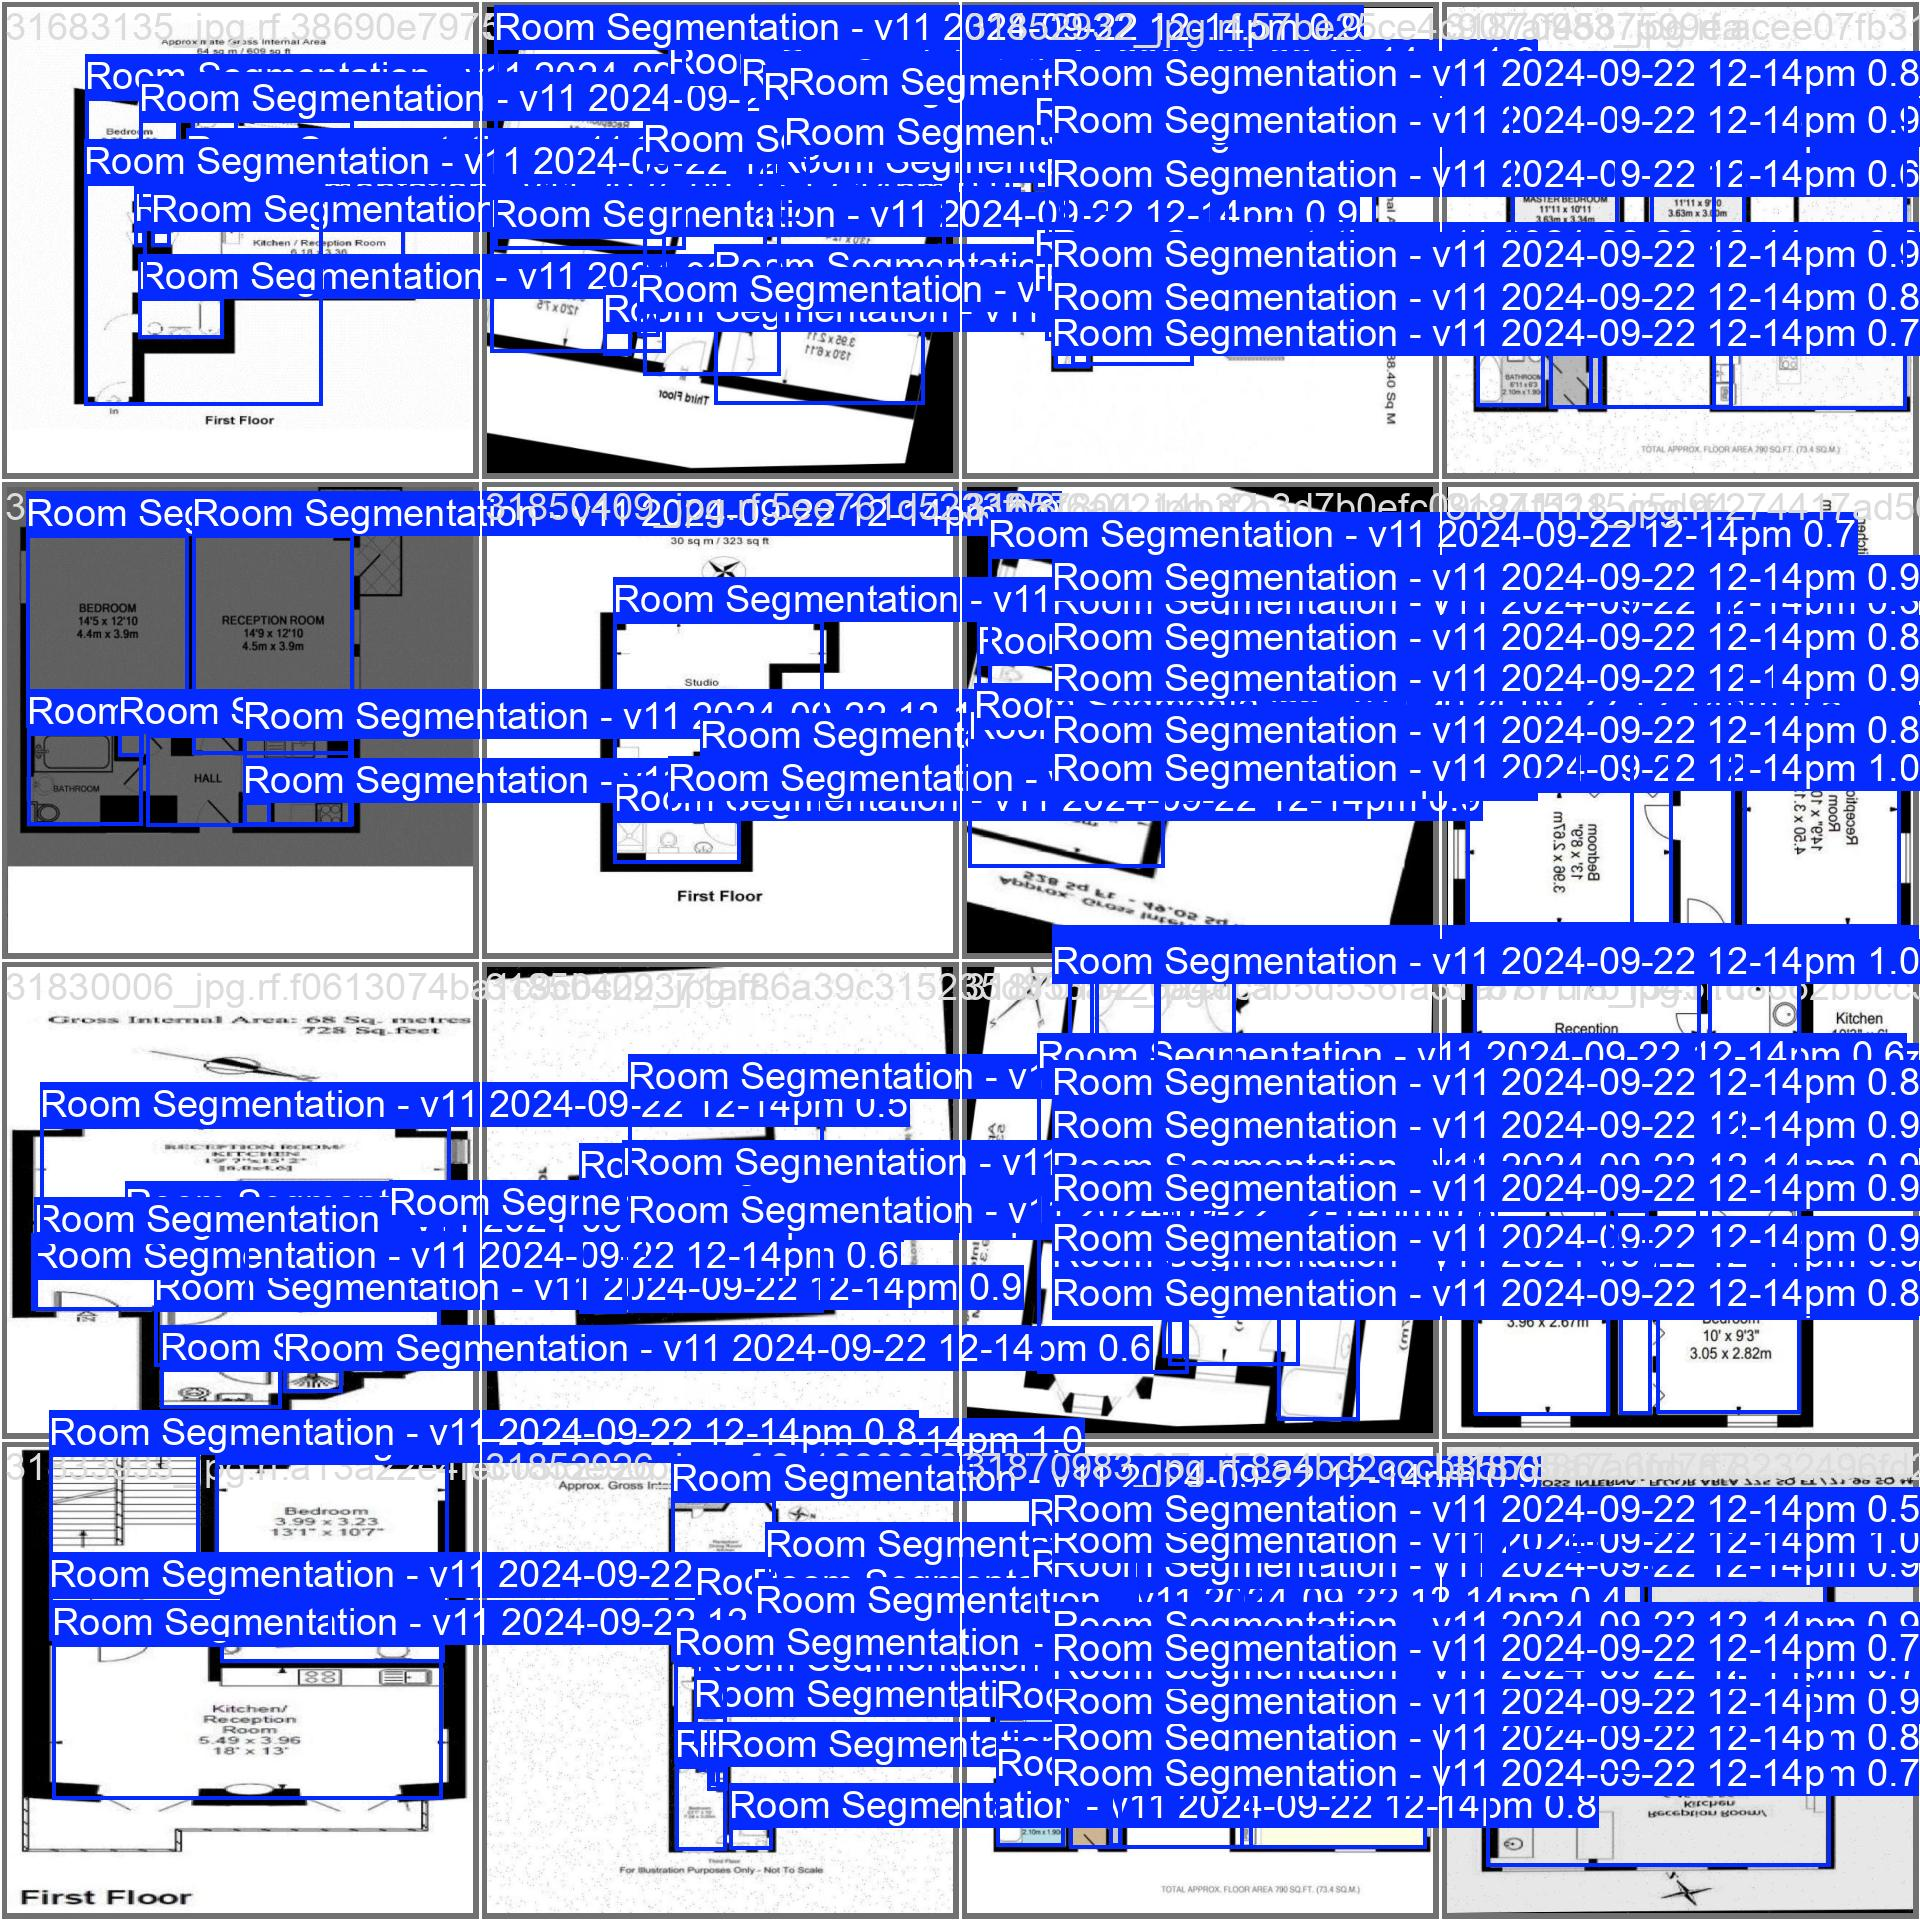

In [12]:
Image("/content/runs/detect/train/val_batch1_pred.jpg", width=1200)

In [13]:
!yolo task=detect mode=val model="/content/runs/detect/train/weights/best.pt" data={dataset.location}/data.yaml

Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /content/Floorplan-Segmentation-1/valid/labels.cache... 243 images, 0 backgrounds, 0 corrupt: 100% 243/243 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 16/16 [00:12<00:00,  1.24it/s]
                   all        243       2392      0.917      0.912       0.96      0.854
Speed: 4.2ms preprocess, 12.0ms inference, 0.0ms loss, 4.7ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [14]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs

image 1/272 /content/Floorplan-Segmentation-1/test/images/1-_jpg.rf.d4125197539d11ed31fa0fed0acbffa5.jpg: 1024x1024 29 Room Segmentation - v11 2024-09-22 12-14pms, 14.1ms
image 2/272 /content/Floorplan-Segmentation-1/test/images/1-_jpg.rf.f39df42ff40c9309361581665aecb8e9.jpg: 1024x1024 29 Room Segmentation - v11 2024-09-22 12-14pms, 14.0ms
image 3/272 /content/Floorplan-Segmentation-1/test/images/100-DD-Add-3-Drawing-Package_page-0020_jpg.rf.302a54f230414055845085e9591d071f.jpg: 1024x1024 52 Room Segmentation - v11 2024-09-22 12-14pms, 14.0ms
image 4/272 /content/Floorplan-Segmentation-1/test/images/100-DD-Add-3-Drawing-Package_page-0027_jpg.rf.e6e5be87f57b178e0298f9b1407c2686.jpg: 1024x1024 95 Room Segmentation - v11 2024-09-22 12-14pms, 14.0ms
image 5/272 /content/Floorplan-Segmentation-1/test/images/10_jpg.rf.e0003d97f8

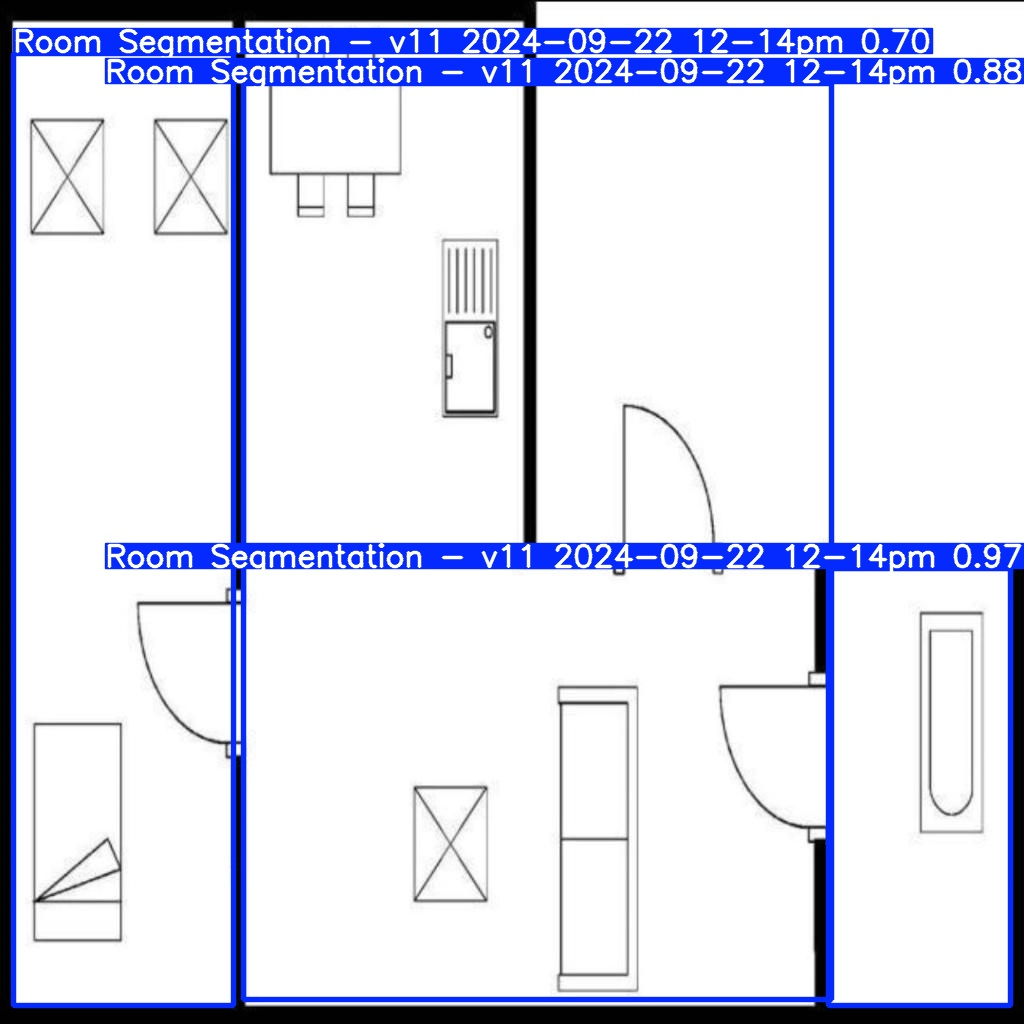

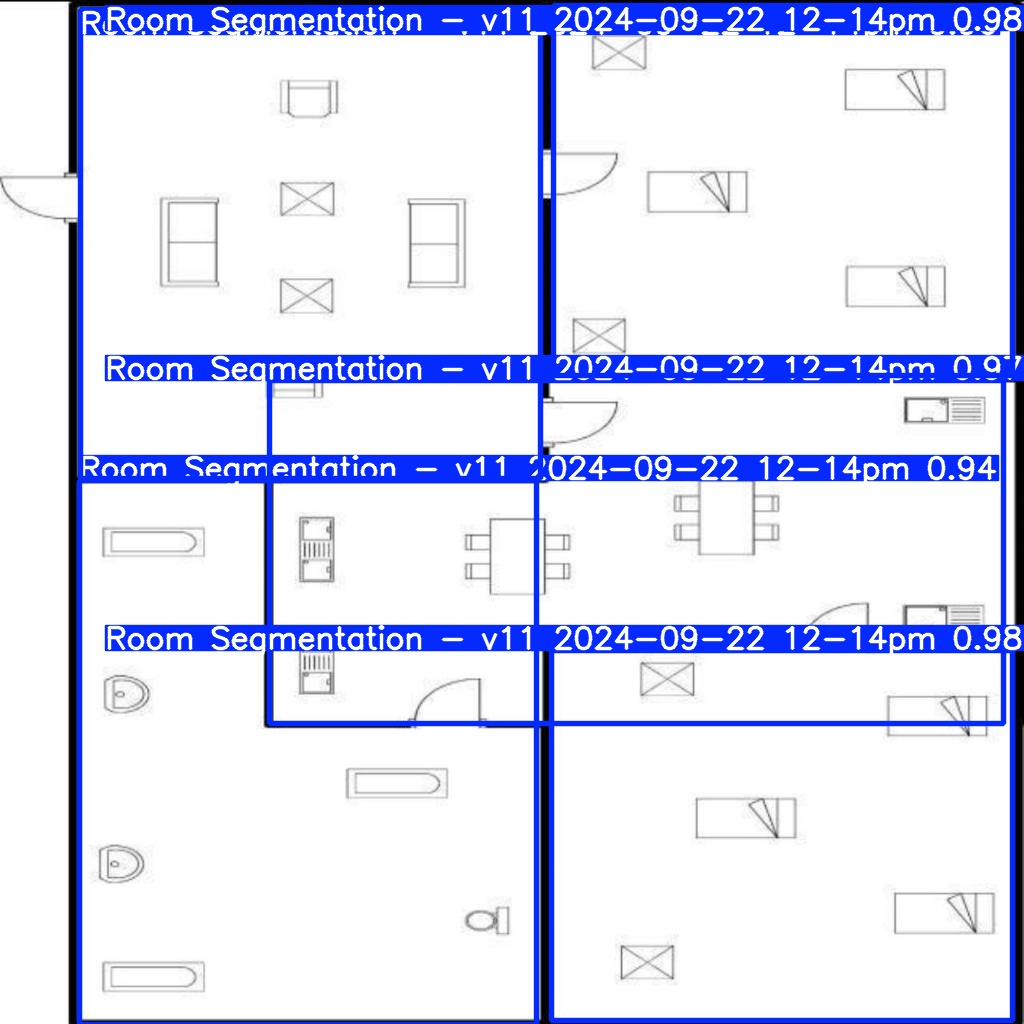

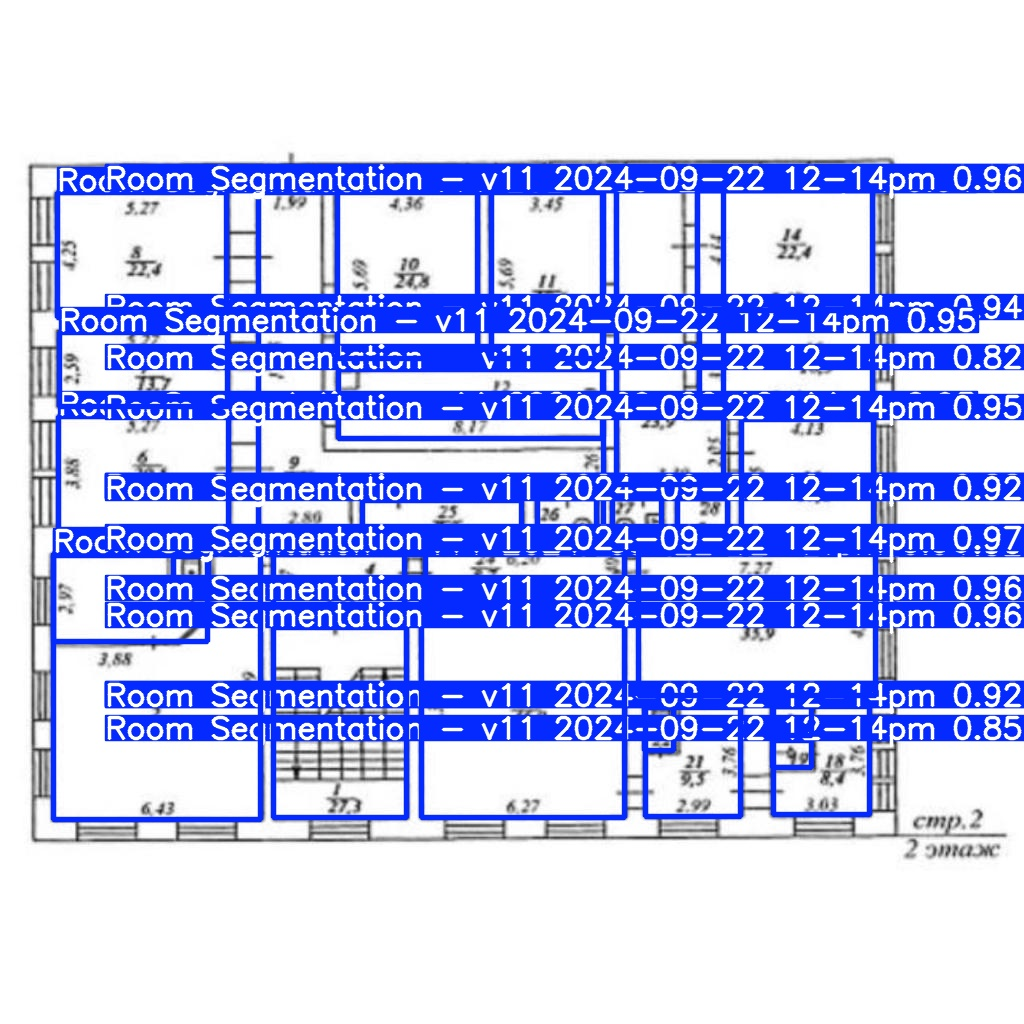

In [15]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
  display(IPyImage(filename=img, width=600))
  print("\n")

In [16]:
!gdown "https://docs.google.com/uc?export=download&id=1I9mXgFXTOWyrxdU_TMR0w_g6CPGgm2ER"

Downloading...
From: https://docs.google.com/uc?export=download&id=1I9mXgFXTOWyrxdU_TMR0w_g6CPGgm2ER
To: /content/sample.jpg
100% 87.5k/87.5k [00:00<00:00, 117MB/s]


In [17]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.25 source=sample.jpg save=True

Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/sample.jpg: 1024x1024 65 Room Segmentation - v11 2024-09-22 12-14pms, 14.0ms
Speed: 11.0ms preprocess, 14.0ms inference, 543.9ms postprocess per image at shape (1, 3, 1024, 1024)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict
